In [32]:
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np
from qiskit_aer import Aer

In [33]:
q_reg = QuantumRegister(3, 'q')
c_reg = ClassicalRegister(3)
circuit = QuantumCircuit(q_reg, c_reg)

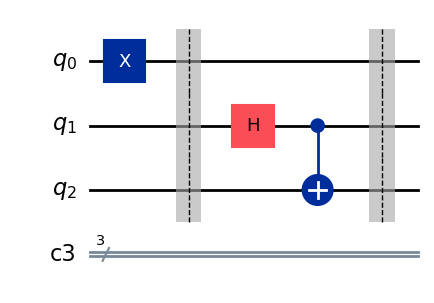

In [34]:
circuit.x(0)

circuit.barrier()

circuit.h(1)
circuit.cx(1, 2)

circuit.barrier()

circuit.draw(output='mpl')

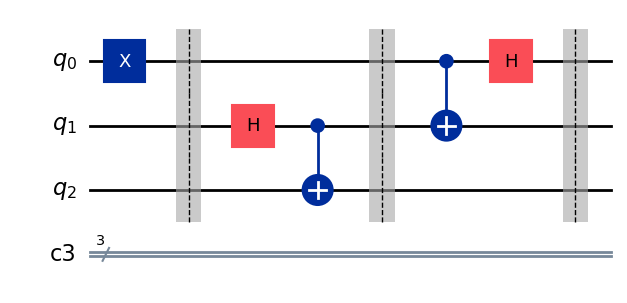

In [35]:
circuit.cx(0, 1)
circuit.h(0)
circuit.barrier()
circuit.draw(output='mpl')

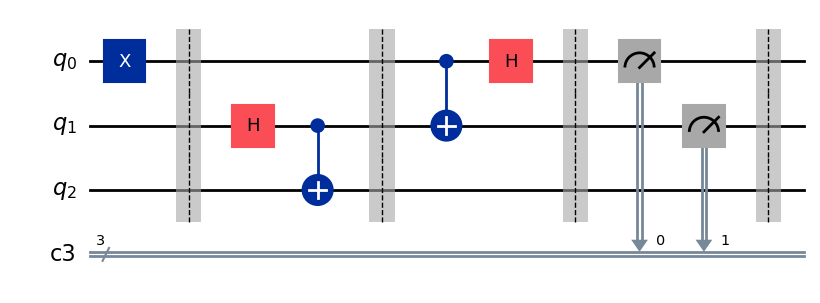

In [36]:
circuit.measure([0, 1], [0, 1])
circuit.barrier()
circuit.draw(output='mpl')

In [37]:
simulator = Aer.get_backend('qasm_simulator')
result = simulator.run(circuit, shots=1024).result()
counts = result.get_counts(circuit)
print("\nTotal count for 000 and 111 are:", counts)


Total count for 000 and 111 are: {'001': 283, '011': 236, '010': 260, '000': 245}


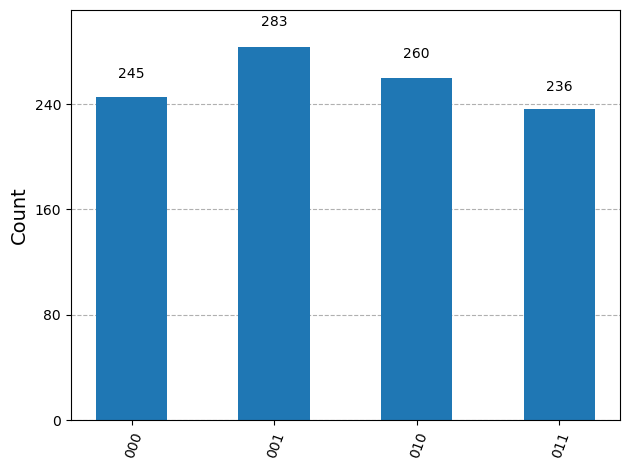

In [38]:
plot_histogram(counts)

Alice's measurements of her two qubits (q0 and q1) effectively "collapse" the entangled state she shares with Bob. Depending on the outcomes of these measurements, the state on Bob's qubit (q2) might end up with an unwanted phase flip or bit flip compared to the original state Alice wanted to teleport.

Specifically, if Alice measures her second qubit (q1) as '1', it means that a phase flip has occurred on Bob's qubit (q2) due to the entanglement and the measurement process. To correct this, Bob needs to apply a ZGATE to his qubit. Since the ZGATE's job is to introduce a phase flip (turning ket|1⟩ into -ket|1⟩ while leaving ket|0⟩ unchanged), applying it effectively undoes the unwanted phase flip caused by Alice's measurement, ensuring that Bob's qubit (q2) perfectly matches the original state Alice intended to teleport.

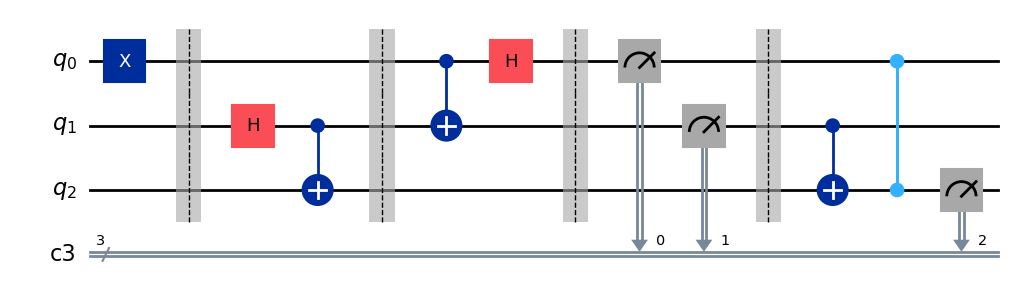

In [39]:
circuit.cx(1, 2)
circuit.cz(0, 2)
circuit.measure([2], [2])
circuit.draw(output='mpl')

In [40]:
simulator = Aer.get_backend('qasm_simulator')
result = simulator.run(circuit, shots=1024).result()
counts = result.get_counts(circuit)
print("\nTotal count for 000 and 111 are:", counts)


Total count for 000 and 111 are: {'101': 247, '110': 270, '100': 258, '111': 249}


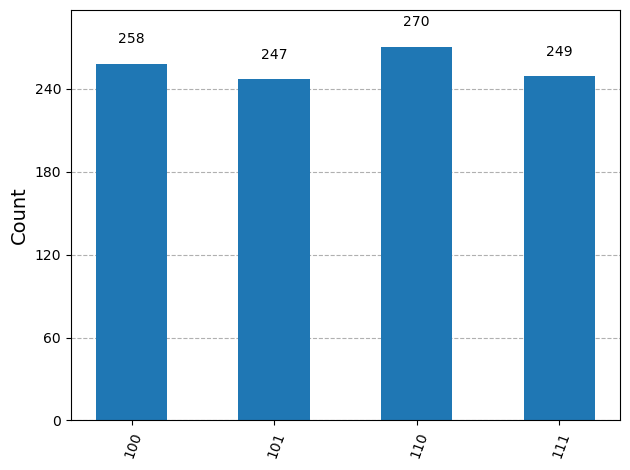

In [41]:
plot_histogram(counts)

q2q1q0